# Libraries & Custom functions

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import DataLoader
from tqdm import tqdm

# Ignore UserWarning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [36]:
############################################################### Functions for Part 1 b) ###############################################################

def BCE_Loss(y_true, y_hat):
    if y_true == y_hat:
        return torch.tensor(0.)

    return -1 * (y_true * torch.log(y_hat) + (1 - y_true) * torch.log(1 - y_hat))


def ForwardPass(X, W, b = 0):

    z1 = torch.matmul(X, W[0].T) + b
    a1 = F.relu(z1)

    z2 = torch.matmul(a1, W[1].T) + b
    a2 = F.leaky_relu(z2, negative_slope = 0.01)

    z3 = torch.matmul(a2, W[2].T) + b
    a3 = F.sigmoid(z3)

    return a3, a2, a1


def BackwardPass(X, a1, a2, a3, y_true, W):

    # Partial derivative of the loss function with respect to the prediction
    dL_da3 = -1 * (y_true / a3 - (1 - y_true) / (1 - a3)) if y_true != a3 else torch.tensor([0.])
    # Partial derivative of the loss function with respect to z3, using the sigmoid derivative
    dL_dz3 = dL_da3 * (a3 * (1 - a3))
    # Partial derivative of the loss function with respect to the weights of the connections between the second hidden layer and the output layer
    dL_dW3 = torch.matmul(dL_dz3.T, a2)

    # Partial derivative of the loss function with respect to the activation values from the second hidden layer
    dL_da2 = torch.matmul(dL_dz3, W[2])
    # Partial derivative of the loss function with respect to z2, using the Leaky ReLU derivative
    dL_dz2 = torch.where(a2 >= 0, dL_da2, 0.01 * dL_da2)
    # Partial derivative of the loss function with respect to the weights of the connections between the first and second hidden layers
    dL_dW2 = torch.matmul(dL_dz2.T, a1)

    # Partial derivative of the loss function with respect to the activation values from the first hidden layer
    dL_da1 = torch.matmul(dL_dz2, W[1])
    # Partial derivative of the loss function with respect to z2, using the ReLU derivative
    dL_dz1 = torch.where(a1 >= 0, dL_da1, 0.0 * dL_da1)
    # Partial derivative of the loss function with respect to the weights of the connections between the input layer and the first hidden layers
    dL_dW1 = torch.matmul(dL_dz1.T, X)

    return dL_dW1, dL_dW2, dL_dW3


def StochasticGradientDescent(dL_dW1, dL_dW2, dL_dW3, W, lr):
    # Update weights using SGD
    W[0] -= lr * dL_dW1
    W[1] -= lr * dL_dW2
    W[2] -= lr * dL_dW3

    return W


############################################################### Functions for Part 1 c) and d) ###############################################################

# Define a function to display a batch of images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Fix the missing closing parenthesis
    plt.show()


def set_device():
    if torch.cuda.is_available():
        device = torch.device('cuda')

    elif torch.backends.mps.is_available():
        device = torch.device('mps')

    else:
        device = torch.device('cpu')
    print('Device:', device)

    return device


class NeuralNetwork_Exercise1_c(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(784, 256)  # Input size for MNIST is 28x28=784
        self.fc2 = torch.nn.Linear(256, 128)
        self.fc3 = torch.nn.Linear(128, 10)   # 10 output classes for Fashion-MNIST
        self.relu = torch.nn.ReLU()
        self.leaky_relu = torch.nn.LeakyReLU(0.01)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define a more complex neural network
class NeuralNetwork_Exercise1_d(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = torch.nn.Linear(784, 256)
        self.fc_128_256 = torch.nn.Linear(128, 256)
        self.fc_256_512 = torch.nn.Linear(256, 512)
        self.fc_128_128 = torch.nn.Linear(128, 128)
        self.fc_256_256 = torch.nn.Linear(256, 256)
        self.fc_512_512 = torch.nn.Linear(512, 512)
        self.fc_512_1024 = torch.nn.Linear(512, 1024)
        self.fc_1024_1024 = torch.nn.Linear(1024, 1024)
        self.fc_1024_2048 = torch.nn.Linear(1024, 2048)
        self.fc_2048_1024 = torch.nn.Linear(2048, 1024)
        self.fc_2048_2048 = torch.nn.Linear(2048, 2048)
        self.fc_1024_512 = torch.nn.Linear(1024, 512)
        self.fc_512_256 = torch.nn.Linear(512, 256)
        self.fc_256_128 = torch.nn.Linear(256, 128)
        self.fc_128_64 = torch.nn.Linear(128, 64)
        self.output_layer = torch.nn.Linear(64, 10)
        self.leaky_relu = torch.nn.LeakyReLU(0.01)
        self.relu = torch.nn.ReLU()
        self.prelu = torch.nn.PReLU()
        self.relu6 = torch.nn.ReLU6()
        self.selu = torch.nn.SELU()
        self.celu = torch.nn.CELU()
        self.gelu = torch.nn.GELU()
        self.silu = torch.nn.SiLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.dropout_10 = torch.nn.Dropout(0.1)
        self.dropout_20 = torch.nn.Dropout(0.2)
        self.dropout_30 = torch.nn.Dropout(0.3)
        self.dropout_40 = torch.nn.Dropout(0.4)
        self.dropout_50 = torch.nn.Dropout(0.5)
        self.dropout_60 = torch.nn.Dropout(0.6)
        self.dropout_70 = torch.nn.Dropout(0.7)
        self.batch_norm2048 = torch.nn.BatchNorm1d(2048)
        self.batch_norm1024 = torch.nn.BatchNorm1d(1024)
        self.batch_norm512 = torch.nn.BatchNorm1d(512)
        self.batch_norm256 = torch.nn.BatchNorm1d(256)
        self.batch_norm128 = torch.nn.BatchNorm1d(128)
        self.batch_norm64 = torch.nn.BatchNorm1d(64)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu6(self.batch_norm256(self.input_layer(x)))
        x = self.dropout_70(x)
        x = self.relu6(self.batch_norm128(self.fc_256_128(x)))
        x = self.dropout_20(x)
        x = self.relu6(self.batch_norm64(self.fc_128_64(x)))
        x = self.output_layer(x)
        return x


def train_c(model, train_loader, optimizer, loss_func, epochs, device, **kwargs):

    num_epochs = kwargs.get('num_epochs', epochs)
    loss_fn = kwargs.get('loss_fn', loss_func)
    device = kwargs.get('device', device)

    train_loss_hist, train_acc_hist = [], []
    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')

        print('Training phase...')
        model.train()
        train_loss = 0.
        total = 0.
        correct = 0.
        pbar = tqdm(enumerate(train_loader), total = len(train_loader))

        for batch_idx, (data, target) in pbar:
            data = data.to(device)
            target = target.to(device)
            model.zero_grad()
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

            pbar.set_description(f'Loss = {loss:.4f}  |  Accuracy = {100 * correct / total:.2f}% | Batch ID = {batch_idx + 1} ')

        train_loss /= len(train_loader)
        train_accuracy = 100 * correct / total
        print(f'Training Cross-Entropy Loss = {train_loss:.4f}')
        print(f'Training Accuracy = {train_accuracy:.2f}%')
        print()

        train_loss_hist.append(train_loss)
        train_acc_hist.append(train_accuracy)

    print(f"Cross-Entropy on training set:  {train_loss_hist[-1]:.4f}")
    print(f"Accuracy on training set:       {train_acc_hist[-1]:.2f}%")

    return train_loss_hist, train_acc_hist


def train_d(model, train_loader, optimizer, scheduler, loss_func, epochs, device, **kwargs):

    num_epochs = kwargs.get('num_epochs', epochs)
    loss_fn = kwargs.get('loss_fn', loss_func)
    device = kwargs.get('device', device)

    train_loss_hist, train_acc_hist = [], []
    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')

        print('Training phase...')
        model.train()
        train_loss = 0.
        total = 0.
        correct = 0.
        pbar = tqdm(enumerate(train_loader), total = len(train_loader))

        for batch_idx, (data, target) in pbar:
            data = data.to(device)
            target = target.to(device)
            model.zero_grad()
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

            pbar.set_description(f'Loss = {loss:.4f}  |  Accuracy = {100 * correct / total:.2f}% | Batch ID = {batch_idx + 1} ')


        train_loss /= len(train_loader)
        train_accuracy = 100 * correct / total
        print(f"Learning Rate = {optimizer.param_groups[0]['lr']}")
        print(f'Training Cross-Entropy Loss = {train_loss:.4f}')
        print(f'Training Accuracy = {train_accuracy:.2f}%')
        print()
        scheduler.step(train_loss)

        train_loss_hist.append(train_loss)
        train_acc_hist.append(train_accuracy)

    print(f"Cross-Entropy on training set:  {train_loss_hist[-1]:.4f}")
    print(f"Accuracy on training set:       {train_acc_hist[-1]:.2f}%")

    return train_loss_hist, train_acc_hist


def test(model, test_loader, loss_func, device):

    model.eval()

    correct = 0
    total = 0
    test_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss += loss_func(outputs, labels).item()

    test_loss /= len(test_loader)
    test_acc = 100 * correct / total

    print(f"Cross-Entropy on test set: {test_loss:.4f}")
    print(f"Accuracy on test set: {test_acc:.2f}%")

    return test_loss, test_acc

# Exercise 1

## Exercise 1, a)

### References
 - https://www.analyticsvidhya.com/blog/2023/01/gradient-descent-vs-backpropagation-whats-the-difference/#:~:text=To%20put%20it%20plainly%2C%20gradient,gradient%20descent%20relies%20on%20backpropagation.

**Backpropagation** and **gradient descent** are like a dynamic duo in training deep neural networks (DNNs).

**Backpropagation** is the process of computing the partial derivatives of the network's parameters with respect to the loss function, in a backward manner. It's all about figuring out how much each parameter contributed to the error, layer by layer, starting from the output layer and working backward through the network. For that, it's crucial to understand the computational graph and the dependencies of each component of the network, for example the activation values. This info helps adjust the network's parameters so to minimize its cost, info that is used for gradient descent.

Now, **gradient descent** is the optimization technique that works hand-in-hand with backpropagation. It's all about finding the (local or global) minimum of the loss function. The gradient (derivative) of the loss with respect to the parameters tells us the direction of the steepest increase. Gradient descent takes steps in the opposite direction to minimize the loss. In order to control how fast or slow the network optimizes its parameters, a learning rate is used, being multiplied with the gradients, and because this is a minimization problem, the old parameters are subtracted by the adjusted gradient of the respective parameters.

So, to sum it up, backpropagation computes the gradients of the network's parameters, while gradient descent uses those gradients to minimize the loss function. They team up to make our neural networks smarter!

## Exercise 1, b)

### References
 - https://towardsdatascience.com/nothing-but-numpy-understanding-creating-binary-classification-neural-networks-with-e746423c8d5c

In [3]:
input_values = torch.tensor([[5., 4., 1., 3., 2.]])

y_true = torch.tensor([1.])

w1 = torch.tensor([[0.2, 0.2, 0.2, 0.2, 0.2],
                   [0.2, 0.2, 0.2, 0.2, 0.2],
                   [0.2, 0.2, 0.2, 0.2, 0.2]])

w2 = torch.tensor([[0.2, 0.2, 0.2],
                   [0.2, 0.2, 0.2]])

w3 = torch.tensor([[0.2, 0.2]])

W = list([w1, w2, w3])

In [4]:
a3, a2, a1 = ForwardPass(input_values, W)
loss = BCE_Loss(y_true, a3)

print("Predicted Output (a3):", a3.item())
print("Expected Output (y_true):", y_true.item())
print("Binary Cross-Entropy Loss:", loss.item())

Predicted Output (a3): 0.6726070046424866
Expected Output (y_true): 1.0
Binary Cross-Entropy Loss: 0.3965940773487091


In [5]:
dL_dW1, dL_dW2, dL_dW3 = BackwardPass(input_values, a1, a2, a3, y_true, W)

print("dL_dW1:", dL_dW1)
print("dL_dW2:", dL_dW2)
print("dL_dW3:", dL_dW3)

dL_dW1: tensor([[-0.1310, -0.1048, -0.0262, -0.0786, -0.0524],
        [-0.1310, -0.1048, -0.0262, -0.0786, -0.0524],
        [-0.1310, -0.1048, -0.0262, -0.0786, -0.0524]])
dL_dW2: tensor([[-0.1964, -0.1964, -0.1964],
        [-0.1964, -0.1964, -0.1964]])
dL_dW3: tensor([[-0.5893, -0.5893]])


In [6]:
W = StochasticGradientDescent(dL_dW1, dL_dW2, dL_dW3, W, lr = 0.2)

print("Updated W1:", W[0])
print("Updated W2:", W[1])
print("Updated W3:", W[2])

Updated W1: tensor([[0.2262, 0.2210, 0.2052, 0.2157, 0.2105],
        [0.2262, 0.2210, 0.2052, 0.2157, 0.2105],
        [0.2262, 0.2210, 0.2052, 0.2157, 0.2105]])
Updated W2: tensor([[0.2393, 0.2393, 0.2393],
        [0.2393, 0.2393, 0.2393]])
Updated W3: tensor([[0.3179, 0.3179]])


<h2>After updating your weights what do you observe? Explain why.</h2>
<p>After computing the loss and doing a backward pass, and given that all weights were initialized with the value 0.2, we can see that all weights increased their values. Tracing back the steps made, we can see that all partial derivatives with respect to all the weights have negative values (different than zero), which corroborates the fact that the weight's values changed in an increasing manner. Because the optimizer implemented was SGD, the symmetric of the partial derivatives with respect to the weights are used, being multiplied by the learning rate. So, considering the weight W[1][1], which is the weight of the connection between the first input node and the first node in the first hidden layer, we can see that dL_dW[1][1] is equal to -0.1310, and because the learning rate is 0.2, the adjusted negative gradient is -(-0.1301 * 0.2), which is equal to 0.0262, and then the new W[1][1] is 0.2 + 0.0262, which is the value that appears in W_updated[1][1] (0.2262). So, the question now becomes, why all partial derivatives of the loss with respect to all weights show non-zero values? Well, that's because the loss different than zero. Looking at how the binary loss is computed, we see that the loss was computed as -log(a[3]) because the ground truth is 1, as the second component of the function cancels out because we get a product with zero. So, this means that there's still more room for improvement, and that's why all partial derivatives with respect to the weights are non-zero, and as consequence, the weight matrices changed, in order to approximate this loss to zero.</p>

## Exercise 1, c)

#### References
 - https://medium.com/@aaysbt/fashion-mnist-data-training-using-pytorch-7f6ad71e96f4

#### Data Loader

In [7]:
# Define data preprocessing and loading / Define a transform to convert to images to tensor and normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#### Data Visualization - Sample from the train_loader (size 64 - batch size)

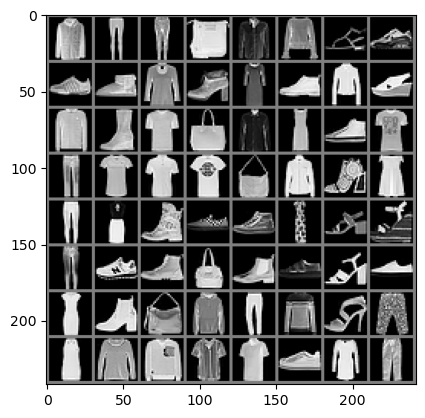

    4     1     1     8     6     6     5     7     7     9     2     9     3     9     4     5     2     9     0     8     6     3     7     0     1     0     0     0     8     4     9     3     1     3     9     7     7     3     5     5     1     7     9     8     9     7     5     7     3     9     8     2     1     2     5     1     0     2     2     6     0     7     3     1


In [8]:
# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{labels[j]:5}' for j in range(batch_size)))


In [9]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root = './data', train = True, download = True, transform = transform)
testset = torchvision.datasets.FashionMNIST(root = './data', train = False, download = True, transform = transform)

TrainLoader = torch.utils.data.DataLoader(trainset, batch_size = 2048, shuffle = True)
TestLoader = torch.utils.data.DataLoader(testset, batch_size = 2048, shuffle = False)

In [10]:
# Initialize the network, loss function, and optimizer
device = set_device()
NeuralNetwork = NeuralNetwork_Exercise1_c().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(NeuralNetwork.parameters(), lr = 0.2)

Device: mps


In [11]:
train_loss_hist, train_acc_hist = train_c(NeuralNetwork, TrainLoader, optimizer, criterion, epochs = 32, device = device)

Epoch 1/32
Training phase...


  0%|          | 0/30 [00:00<?, ?it/s]

Loss = 1.0006  |  Accuracy = 54.12% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  8.84it/s]


Training Cross-Entropy Loss = 1.3706
Training Accuracy = 54.12%

Epoch 2/32
Training phase...


Loss = 0.6904  |  Accuracy = 71.42% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.46it/s]


Training Cross-Entropy Loss = 0.7608
Training Accuracy = 71.42%

Epoch 3/32
Training phase...


Loss = 0.6171  |  Accuracy = 74.71% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.41it/s]


Training Cross-Entropy Loss = 0.6662
Training Accuracy = 74.71%

Epoch 4/32
Training phase...


Loss = 0.5475  |  Accuracy = 77.68% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.85it/s]


Training Cross-Entropy Loss = 0.5919
Training Accuracy = 77.68%

Epoch 5/32
Training phase...


Loss = 0.5403  |  Accuracy = 79.18% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.74it/s]


Training Cross-Entropy Loss = 0.5564
Training Accuracy = 79.18%

Epoch 6/32
Training phase...


Loss = 0.4122  |  Accuracy = 80.95% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.22it/s]


Training Cross-Entropy Loss = 0.5086
Training Accuracy = 80.95%

Epoch 7/32
Training phase...


Loss = 0.4838  |  Accuracy = 81.36% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.24it/s]


Training Cross-Entropy Loss = 0.4950
Training Accuracy = 81.36%

Epoch 8/32
Training phase...


Loss = 0.4434  |  Accuracy = 82.16% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.60it/s]


Training Cross-Entropy Loss = 0.4799
Training Accuracy = 82.16%

Epoch 9/32
Training phase...


Loss = 0.4858  |  Accuracy = 82.91% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.41it/s]


Training Cross-Entropy Loss = 0.4622
Training Accuracy = 82.91%

Epoch 10/32
Training phase...


Loss = 0.4470  |  Accuracy = 83.22% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.24it/s]


Training Cross-Entropy Loss = 0.4566
Training Accuracy = 83.22%

Epoch 11/32
Training phase...


Loss = 0.4378  |  Accuracy = 84.46% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.60it/s]


Training Cross-Entropy Loss = 0.4268
Training Accuracy = 84.46%

Epoch 12/32
Training phase...


Loss = 0.4454  |  Accuracy = 84.30% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.63it/s]


Training Cross-Entropy Loss = 0.4285
Training Accuracy = 84.30%

Epoch 13/32
Training phase...


Loss = 0.4296  |  Accuracy = 84.77% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  8.53it/s]


Training Cross-Entropy Loss = 0.4138
Training Accuracy = 84.77%

Epoch 14/32
Training phase...


Loss = 0.4453  |  Accuracy = 84.80% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.68it/s]


Training Cross-Entropy Loss = 0.4168
Training Accuracy = 84.80%

Epoch 15/32
Training phase...


Loss = 0.3703  |  Accuracy = 85.29% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.40it/s]


Training Cross-Entropy Loss = 0.4004
Training Accuracy = 85.29%

Epoch 16/32
Training phase...


Loss = 0.3763  |  Accuracy = 85.25% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.20it/s]


Training Cross-Entropy Loss = 0.4012
Training Accuracy = 85.25%

Epoch 17/32
Training phase...


Loss = 0.4042  |  Accuracy = 85.31% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.60it/s]


Training Cross-Entropy Loss = 0.3999
Training Accuracy = 85.31%

Epoch 18/32
Training phase...


Loss = 0.3718  |  Accuracy = 85.98% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.77it/s]


Training Cross-Entropy Loss = 0.3802
Training Accuracy = 85.98%

Epoch 19/32
Training phase...


Loss = 0.3650  |  Accuracy = 86.14% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.51it/s]


Training Cross-Entropy Loss = 0.3754
Training Accuracy = 86.14%

Epoch 20/32
Training phase...


Loss = 0.3834  |  Accuracy = 86.34% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.78it/s]


Training Cross-Entropy Loss = 0.3707
Training Accuracy = 86.34%

Epoch 21/32
Training phase...


Loss = 0.3630  |  Accuracy = 86.59% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.80it/s]


Training Cross-Entropy Loss = 0.3671
Training Accuracy = 86.59%

Epoch 22/32
Training phase...


Loss = 0.3419  |  Accuracy = 86.63% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.12it/s]


Training Cross-Entropy Loss = 0.3631
Training Accuracy = 86.63%

Epoch 23/32
Training phase...


Loss = 0.3108  |  Accuracy = 86.98% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.64it/s]


Training Cross-Entropy Loss = 0.3533
Training Accuracy = 86.98%

Epoch 24/32
Training phase...


Loss = 0.4009  |  Accuracy = 86.65% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.68it/s]


Training Cross-Entropy Loss = 0.3623
Training Accuracy = 86.65%

Epoch 25/32
Training phase...


Loss = 0.3617  |  Accuracy = 87.05% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.73it/s]


Training Cross-Entropy Loss = 0.3507
Training Accuracy = 87.05%

Epoch 26/32
Training phase...


Loss = 0.3599  |  Accuracy = 86.94% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.39it/s]


Training Cross-Entropy Loss = 0.3537
Training Accuracy = 86.94%

Epoch 27/32
Training phase...


Loss = 0.3204  |  Accuracy = 87.58% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.63it/s]


Training Cross-Entropy Loss = 0.3388
Training Accuracy = 87.58%

Epoch 28/32
Training phase...


Loss = 0.3316  |  Accuracy = 87.50% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.65it/s]


Training Cross-Entropy Loss = 0.3425
Training Accuracy = 87.50%

Epoch 29/32
Training phase...


Loss = 0.3020  |  Accuracy = 87.76% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.39it/s]


Training Cross-Entropy Loss = 0.3317
Training Accuracy = 87.76%

Epoch 30/32
Training phase...


Loss = 0.3201  |  Accuracy = 87.39% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.67it/s]


Training Cross-Entropy Loss = 0.3373
Training Accuracy = 87.39%

Epoch 31/32
Training phase...


Loss = 0.3586  |  Accuracy = 88.08% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.57it/s]


Training Cross-Entropy Loss = 0.3234
Training Accuracy = 88.08%

Epoch 32/32
Training phase...


Loss = 0.3607  |  Accuracy = 87.46% | Batch ID = 30 : 100%|██████████| 30/30 [00:03<00:00,  9.13it/s]

Training Cross-Entropy Loss = 0.3417
Training Accuracy = 87.46%

Cross-Entropy on training set:  0.3417
Accuracy on training set:       87.46%


In [12]:
test_loss, test_acc = test(NeuralNetwork, TestLoader, criterion, device)

Cross-Entropy on test set: 0.4284
Accuracy on test set: 84.34%


## Exercise 1, d) 

To improve the previous feedforward neural network for the Fashion-MNIST classification task, we implemented the following changes:

**Use a Learning Rate Scheduler**: One of the most, if not the most important hyper-parameter in a neural network is the learning rate. This choice is very important, and in fact affects a lot the results given by the network. The problem with a constant learning rate is that it doesn't adapt to the training stage, because in the beginning the learning rate can be higher because the network still has a lot to learn, and therefore the updates made by the optimizer can be bigger; however, when the network is converging, a smaller learning rate is better suited because larger steps will make the network wand around the local minimum, but never reaches it. To deal with this, we applied a learning rate scheduler, which changes the learning rate's value during training, adapting it depending on the training stage.

**Use Different Optimizer**: Previously we used Stochastic Gradient Descent as our optimizer, however there're more algorithms that, theoretically, converge even faster than a simple SDG. Some examples are Root Meas Square propagation (RMSprop) and Adaptive Moment (Adam), or even SGD with momentum (Nesterov or not). These algorithms are more interesting because they use exponential smoothing to make the gradients focus on pointing more towards the local minimum. This, combined with a good learning rate trategy can make a model very powerfull!

**Use Different Activation Function**: We tested several activation function, for example ReLU, Leaky ReLU, and Sigmoid, in order to check how different activation functions impact not only the training loss, but also how well certain activation functions can help the network generalize better.

**Variance vs Bias**: Although activation functions can improve the results, we wanted to reduce overfitting as much as possible, while also keeping the network from underfitting, and for that we used two techniques specifically created to deal with overfitting, which are regularization techniques and dropout layers.

**Batch Normalization**: It's usual to normalize the input data before training or testing a neural network, so that the data's different scales don't affect the importance the network gives to certain inputs in detriment of others that might be as much, or even more important. Therefore, it also makes sense to normalize the values computed by the network during training. So, by applying batch normalization we can help the network stabilize and converge faster to a local minimum.

**Change Epoch Number and Mini-Batch Size**: Another two important hyper-paramters are epochs and the mini-batch size. The size of the mini-batch affects the training time of the network, but also enables the optimizer to be applied more or less times, per epoch, and this can make the model learn more in less epochs. The number of epochs is also important because after a certain ammount of epochs the model might still be learning, so in order for it to converge more epochs might be required.

**Increase Network Complexity**: We can add more hidden layers and neurons to increase the network's capacity to learn complex patterns in the data.

In [20]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root = './data', train = True, download = True, transform = transform)
testset = torchvision.datasets.FashionMNIST(root = './data', train = False, download = True, transform = transform)

TrainLoader = torch.utils.data.DataLoader(trainset, batch_size = 256, shuffle = True)
TestLoader = torch.utils.data.DataLoader(testset, batch_size = 256, shuffle = False)

In [37]:
# Initialize the network, loss function, and optimizer
device = set_device()
NeuralNetwork_complex = NeuralNetwork_Exercise1_d().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(NeuralNetwork_complex.parameters(), lr = 0.005, weight_decay = 0.001)  # L2 regularization
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 4, gamma = 0.5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor = 0.5, patience = 1, threshold = 0.02)

Device: mps


In [38]:
train_loss_hist, train_acc_hist = train_d(NeuralNetwork_complex, TrainLoader, optimizer, scheduler, criterion, epochs = 64, device = device)

Epoch 1/64
Training phase...


Loss = 0.5252  |  Accuracy = 76.25% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 34.42it/s]


Learning Rate = 0.005
Training Cross-Entropy Loss = 0.6719
Training Accuracy = 76.25%

Epoch 2/64
Training phase...


Loss = 0.5515  |  Accuracy = 79.40% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.77it/s]


Learning Rate = 0.005
Training Cross-Entropy Loss = 0.5693
Training Accuracy = 79.40%

Epoch 3/64
Training phase...


Loss = 0.5686  |  Accuracy = 79.46% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 35.76it/s]


Learning Rate = 0.005
Training Cross-Entropy Loss = 0.5656
Training Accuracy = 79.46%

Epoch 4/64
Training phase...


Loss = 0.5222  |  Accuracy = 79.51% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 34.42it/s]


Learning Rate = 0.005
Training Cross-Entropy Loss = 0.5641
Training Accuracy = 79.51%

Epoch 5/64
Training phase...


Loss = 0.4874  |  Accuracy = 81.57% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.76it/s]


Learning Rate = 0.0025
Training Cross-Entropy Loss = 0.5106
Training Accuracy = 81.57%

Epoch 6/64
Training phase...


Loss = 0.4828  |  Accuracy = 81.81% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.03it/s]


Learning Rate = 0.0025
Training Cross-Entropy Loss = 0.5023
Training Accuracy = 81.81%

Epoch 7/64
Training phase...


Loss = 0.6339  |  Accuracy = 82.11% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.40it/s]


Learning Rate = 0.0025
Training Cross-Entropy Loss = 0.5005
Training Accuracy = 82.11%

Epoch 8/64
Training phase...


Loss = 0.5610  |  Accuracy = 83.77% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 35.12it/s]


Learning Rate = 0.00125
Training Cross-Entropy Loss = 0.4557
Training Accuracy = 83.77%

Epoch 9/64
Training phase...


Loss = 0.3266  |  Accuracy = 83.69% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.10it/s]


Learning Rate = 0.00125
Training Cross-Entropy Loss = 0.4493
Training Accuracy = 83.69%

Epoch 10/64
Training phase...


Loss = 0.4822  |  Accuracy = 83.98% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.46it/s]


Learning Rate = 0.00125
Training Cross-Entropy Loss = 0.4432
Training Accuracy = 83.98%

Epoch 11/64
Training phase...


Loss = 0.5333  |  Accuracy = 84.19% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.68it/s]


Learning Rate = 0.00125
Training Cross-Entropy Loss = 0.4400
Training Accuracy = 84.19%

Epoch 12/64
Training phase...


Loss = 0.3847  |  Accuracy = 84.31% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.05it/s]


Learning Rate = 0.00125
Training Cross-Entropy Loss = 0.4351
Training Accuracy = 84.31%

Epoch 13/64
Training phase...


Loss = 0.3684  |  Accuracy = 85.39% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.92it/s]


Learning Rate = 0.000625
Training Cross-Entropy Loss = 0.4044
Training Accuracy = 85.39%

Epoch 14/64
Training phase...


Loss = 0.3958  |  Accuracy = 85.76% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.69it/s]


Learning Rate = 0.000625
Training Cross-Entropy Loss = 0.3935
Training Accuracy = 85.76%

Epoch 15/64
Training phase...


Loss = 0.2789  |  Accuracy = 86.18% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 38.35it/s]


Learning Rate = 0.000625
Training Cross-Entropy Loss = 0.3860
Training Accuracy = 86.18%

Epoch 16/64
Training phase...


Loss = 0.2901  |  Accuracy = 86.22% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 38.48it/s]


Learning Rate = 0.000625
Training Cross-Entropy Loss = 0.3838
Training Accuracy = 86.22%

Epoch 17/64
Training phase...


Loss = 0.4151  |  Accuracy = 86.14% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 38.53it/s]


Learning Rate = 0.000625
Training Cross-Entropy Loss = 0.3827
Training Accuracy = 86.14%

Epoch 18/64
Training phase...


Loss = 0.3423  |  Accuracy = 86.36% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.54it/s]


Learning Rate = 0.000625
Training Cross-Entropy Loss = 0.3806
Training Accuracy = 86.36%

Epoch 19/64
Training phase...


Loss = 0.2998  |  Accuracy = 87.12% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.09it/s]


Learning Rate = 0.0003125
Training Cross-Entropy Loss = 0.3567
Training Accuracy = 87.12%

Epoch 20/64
Training phase...


Loss = 0.2844  |  Accuracy = 87.47% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.36it/s]


Learning Rate = 0.0003125
Training Cross-Entropy Loss = 0.3494
Training Accuracy = 87.47%

Epoch 21/64
Training phase...


Loss = 0.3381  |  Accuracy = 87.54% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 38.41it/s]


Learning Rate = 0.0003125
Training Cross-Entropy Loss = 0.3435
Training Accuracy = 87.54%

Epoch 22/64
Training phase...


Loss = 0.3443  |  Accuracy = 87.54% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 38.14it/s]


Learning Rate = 0.0003125
Training Cross-Entropy Loss = 0.3462
Training Accuracy = 87.54%

Epoch 23/64
Training phase...


Loss = 0.3136  |  Accuracy = 88.14% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.37it/s]


Learning Rate = 0.00015625
Training Cross-Entropy Loss = 0.3294
Training Accuracy = 88.14%

Epoch 24/64
Training phase...


Loss = 0.2850  |  Accuracy = 88.36% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.14it/s]


Learning Rate = 0.00015625
Training Cross-Entropy Loss = 0.3213
Training Accuracy = 88.36%

Epoch 25/64
Training phase...


Loss = 0.3467  |  Accuracy = 88.56% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.43it/s]


Learning Rate = 0.00015625
Training Cross-Entropy Loss = 0.3178
Training Accuracy = 88.56%

Epoch 26/64
Training phase...


Loss = 0.4648  |  Accuracy = 88.52% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.59it/s]


Learning Rate = 0.00015625
Training Cross-Entropy Loss = 0.3179
Training Accuracy = 88.52%

Epoch 27/64
Training phase...


Loss = 0.3749  |  Accuracy = 88.87% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 35.91it/s]


Learning Rate = 7.8125e-05
Training Cross-Entropy Loss = 0.3094
Training Accuracy = 88.87%

Epoch 28/64
Training phase...


Loss = 0.4935  |  Accuracy = 89.00% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.06it/s]


Learning Rate = 7.8125e-05
Training Cross-Entropy Loss = 0.3074
Training Accuracy = 89.00%

Epoch 29/64
Training phase...


Loss = 0.3197  |  Accuracy = 89.07% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.53it/s]


Learning Rate = 7.8125e-05
Training Cross-Entropy Loss = 0.3032
Training Accuracy = 89.07%

Epoch 30/64
Training phase...


Loss = 0.3531  |  Accuracy = 89.12% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.47it/s]


Learning Rate = 7.8125e-05
Training Cross-Entropy Loss = 0.3036
Training Accuracy = 89.12%

Epoch 31/64
Training phase...


Loss = 0.2972  |  Accuracy = 89.23% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.67it/s]


Learning Rate = 7.8125e-05
Training Cross-Entropy Loss = 0.2980
Training Accuracy = 89.23%

Epoch 32/64
Training phase...


Loss = 0.1719  |  Accuracy = 89.23% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.84it/s]


Learning Rate = 3.90625e-05
Training Cross-Entropy Loss = 0.2960
Training Accuracy = 89.23%

Epoch 33/64
Training phase...


Loss = 0.1967  |  Accuracy = 89.37% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 38.20it/s]


Learning Rate = 3.90625e-05
Training Cross-Entropy Loss = 0.2948
Training Accuracy = 89.37%

Epoch 34/64
Training phase...


Loss = 0.2464  |  Accuracy = 89.39% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.08it/s]


Learning Rate = 3.90625e-05
Training Cross-Entropy Loss = 0.2954
Training Accuracy = 89.39%

Epoch 35/64
Training phase...


Loss = 0.2981  |  Accuracy = 89.53% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.05it/s]


Learning Rate = 1.953125e-05
Training Cross-Entropy Loss = 0.2906
Training Accuracy = 89.53%

Epoch 36/64
Training phase...


Loss = 0.3160  |  Accuracy = 89.46% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.27it/s]


Learning Rate = 1.953125e-05
Training Cross-Entropy Loss = 0.2926
Training Accuracy = 89.46%

Epoch 37/64
Training phase...


Loss = 0.2872  |  Accuracy = 89.72% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 38.17it/s]


Learning Rate = 9.765625e-06
Training Cross-Entropy Loss = 0.2854
Training Accuracy = 89.72%

Epoch 38/64
Training phase...


Loss = 0.3252  |  Accuracy = 89.52% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.17it/s]


Learning Rate = 9.765625e-06
Training Cross-Entropy Loss = 0.2919
Training Accuracy = 89.52%

Epoch 39/64
Training phase...


Loss = 0.1739  |  Accuracy = 89.57% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.71it/s]


Learning Rate = 9.765625e-06
Training Cross-Entropy Loss = 0.2884
Training Accuracy = 89.57%

Epoch 40/64
Training phase...


Loss = 0.2880  |  Accuracy = 89.62% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.39it/s]


Learning Rate = 4.8828125e-06
Training Cross-Entropy Loss = 0.2866
Training Accuracy = 89.62%

Epoch 41/64
Training phase...


Loss = 0.3774  |  Accuracy = 89.58% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.95it/s]


Learning Rate = 4.8828125e-06
Training Cross-Entropy Loss = 0.2896
Training Accuracy = 89.58%

Epoch 42/64
Training phase...


Loss = 0.3520  |  Accuracy = 89.60% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.99it/s]


Learning Rate = 2.44140625e-06
Training Cross-Entropy Loss = 0.2887
Training Accuracy = 89.60%

Epoch 43/64
Training phase...


Loss = 0.4630  |  Accuracy = 89.45% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.32it/s]


Learning Rate = 2.44140625e-06
Training Cross-Entropy Loss = 0.2912
Training Accuracy = 89.45%

Epoch 44/64
Training phase...


Loss = 0.4833  |  Accuracy = 89.55% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.31it/s]


Learning Rate = 1.220703125e-06
Training Cross-Entropy Loss = 0.2894
Training Accuracy = 89.55%

Epoch 45/64
Training phase...


Loss = 0.4011  |  Accuracy = 89.61% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.44it/s]


Learning Rate = 1.220703125e-06
Training Cross-Entropy Loss = 0.2890
Training Accuracy = 89.61%

Epoch 46/64
Training phase...


Loss = 0.2736  |  Accuracy = 89.62% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 38.23it/s]


Learning Rate = 6.103515625e-07
Training Cross-Entropy Loss = 0.2876
Training Accuracy = 89.62%

Epoch 47/64
Training phase...


Loss = 0.4165  |  Accuracy = 89.74% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.99it/s]


Learning Rate = 6.103515625e-07
Training Cross-Entropy Loss = 0.2867
Training Accuracy = 89.74%

Epoch 48/64
Training phase...


Loss = 0.4015  |  Accuracy = 89.58% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.90it/s]


Learning Rate = 3.0517578125e-07
Training Cross-Entropy Loss = 0.2872
Training Accuracy = 89.58%

Epoch 49/64
Training phase...


Loss = 0.2086  |  Accuracy = 89.74% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.09it/s]


Learning Rate = 3.0517578125e-07
Training Cross-Entropy Loss = 0.2840
Training Accuracy = 89.74%

Epoch 50/64
Training phase...


Loss = 0.2655  |  Accuracy = 89.65% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.08it/s]


Learning Rate = 1.52587890625e-07
Training Cross-Entropy Loss = 0.2871
Training Accuracy = 89.65%

Epoch 51/64
Training phase...


Loss = 0.2641  |  Accuracy = 89.69% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.28it/s]


Learning Rate = 1.52587890625e-07
Training Cross-Entropy Loss = 0.2859
Training Accuracy = 89.69%

Epoch 52/64
Training phase...


Loss = 0.1969  |  Accuracy = 89.61% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.63it/s]


Learning Rate = 7.62939453125e-08
Training Cross-Entropy Loss = 0.2867
Training Accuracy = 89.61%

Epoch 53/64
Training phase...


Loss = 0.2854  |  Accuracy = 89.66% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.01it/s]


Learning Rate = 7.62939453125e-08
Training Cross-Entropy Loss = 0.2884
Training Accuracy = 89.66%

Epoch 54/64
Training phase...


Loss = 0.2872  |  Accuracy = 89.67% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.01it/s]


Learning Rate = 3.814697265625e-08
Training Cross-Entropy Loss = 0.2889
Training Accuracy = 89.67%

Epoch 55/64
Training phase...


Loss = 0.3059  |  Accuracy = 89.68% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.29it/s]


Learning Rate = 3.814697265625e-08
Training Cross-Entropy Loss = 0.2864
Training Accuracy = 89.68%

Epoch 56/64
Training phase...


Loss = 0.2512  |  Accuracy = 89.65% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.99it/s]


Learning Rate = 1.9073486328125e-08
Training Cross-Entropy Loss = 0.2860
Training Accuracy = 89.65%

Epoch 57/64
Training phase...


Loss = 0.3507  |  Accuracy = 89.65% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 38.13it/s]


Learning Rate = 1.9073486328125e-08
Training Cross-Entropy Loss = 0.2861
Training Accuracy = 89.65%

Epoch 58/64
Training phase...


Loss = 0.2565  |  Accuracy = 89.69% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 38.20it/s]


Learning Rate = 1.9073486328125e-08
Training Cross-Entropy Loss = 0.2870
Training Accuracy = 89.69%

Epoch 59/64
Training phase...


Loss = 0.2841  |  Accuracy = 89.67% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.35it/s]


Learning Rate = 1.9073486328125e-08
Training Cross-Entropy Loss = 0.2868
Training Accuracy = 89.67%

Epoch 60/64
Training phase...


Loss = 0.3865  |  Accuracy = 89.73% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.40it/s]


Learning Rate = 1.9073486328125e-08
Training Cross-Entropy Loss = 0.2866
Training Accuracy = 89.73%

Epoch 61/64
Training phase...


Loss = 0.2660  |  Accuracy = 89.72% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.73it/s]


Learning Rate = 1.9073486328125e-08
Training Cross-Entropy Loss = 0.2860
Training Accuracy = 89.72%

Epoch 62/64
Training phase...


Loss = 0.4232  |  Accuracy = 89.73% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.02it/s]


Learning Rate = 1.9073486328125e-08
Training Cross-Entropy Loss = 0.2869
Training Accuracy = 89.73%

Epoch 63/64
Training phase...


Loss = 0.1580  |  Accuracy = 89.60% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 36.94it/s]


Learning Rate = 1.9073486328125e-08
Training Cross-Entropy Loss = 0.2867
Training Accuracy = 89.60%

Epoch 64/64
Training phase...


Loss = 0.3839  |  Accuracy = 89.77% | Batch ID = 235 : 100%|██████████| 235/235 [00:06<00:00, 37.26it/s]

Learning Rate = 1.9073486328125e-08
Training Cross-Entropy Loss = 0.2883
Training Accuracy = 89.77%

Cross-Entropy on training set:  0.2883
Accuracy on training set:       89.77%


In [39]:
test_loss, test_acc = test(NeuralNetwork_complex, TestLoader, criterion, device)

Cross-Entropy on test set: 0.3050
Accuracy on test set: 89.00%


### Explaining results

Original Simple Feedforward Neural Network:

After 10 epochs, the loss on the training set is 0.3628, and the accuracy on the test set is 84.47%.
The Cross-Entropy on the training set is 0.3741, and on the test set, it's 0.4217.
Modified Complex Feedforward Neural Network:

After 10 epochs, the loss on the training set is 0.2230, and the accuracy on the test set is 88.66%.
The Cross-Entropy on the training set is 0.1927, and on the test set, it's 0.3200.
Comparison:

Training Loss: The modified complex network achieves a significantly lower training loss (0.2230) compared to the original simple network (0.3628). This indicates that the complex network learns the training data better.

Test Accuracy: The modified complex network achieves a higher test accuracy (88.66%) compared to the original simple network (84.47%). This suggests that the complex network generalizes better to unseen data.

Cross-Entropy: The Cross-Entropy on the training set is lower for the complex network (0.1927) compared to the original network (0.3741). Additionally, the Cross-Entropy on the test set is lower for the complex network (0.3200) compared to the original network (0.4217). Lower Cross-Entropy values indicate better model performance.

In summary, the modified complex feedforward neural network with increased complexity, Leaky ReLU activations, L2 regularization, batch normalization, and dropout shows improved performance over the original simple network. It achieves both lower training loss and better generalization to the test set, resulting in higher accuracy and lower Cross-Entropy.

## Exercise 1, e)

Looking at both architectures, it's visible that Network A is deeper and has less neurons in each hidden layer, than Network B. That being said, this simple choice of the architecture truly affects a model's predictive power. That being said, Network A is better than Ntework B for several reasons:

1. **Representation Power**: Deeper neural networks have more layers, which means they can learn more complex representations of the input data. Each neuron in the first hidden layer can learn a different feature of the data, and the subsequent layers can combine these features, from all neurons from the previous hidden layer, to learn even more complex representations by combining this elementary features into more complete ones. This allows the network to capture more intricate patterns in the data, leading to better performance. In other words, we can say that Network A is able to start by learning initial underlying factors of variation of the target, and for the subsequent layers these variation factors are taken (or not) into consideration in order to detect more complex variation factors that better explain the function to which we're apporximating.

2. **Generalization**: Deeper neural networks are less likely to overfit the training data than shallow networks. This is because deeper networks have more parameters, which allows them to learn more complex functions that can better fit the training data. Goodfellow et al. (2014d) showed, in a multi-digit numbers dataset, that the depth of a neural network constantly increased the network's accuracy, going from around 92.5% to 96%. This means that Network A should be able to generalize better on test data than Network B.

3. **Efficiency**: Deeper neural networks can be more efficient than shallow networks in terms of the number of parameters required to achieve a certain level of performance. This is because deeper networks can use fewer parameters per layer, since each layer only needs to learn a small part of the overall function. This can lead to faster training times and lower memory requirements. So, we can also assume that Network A might be faster to train that Network B.